In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [3]:
print(data.shape)
print(test.shape)

(10683, 11)
(2671, 10)


In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
for n, i in enumerate(data['Route'].isnull().values):
    if i == True:
        print(n)

9039


In [8]:
data.loc[9039, :]

Airline               Air India
Date_of_Journey       6/05/2019
Source                    Delhi
Destination              Cochin
Route                       NaN
Dep_Time                  09:45
Arrival_Time       09:25 07 May
Duration                23h 40m
Total_Stops                 NaN
Additional_Info         No info
Price                      7480
Name: 9039, dtype: object

In [9]:
data.drop([9039], axis=0, inplace=True)

In [10]:
for n, i in enumerate(data["Route"].isnull().values):
    if i == True:
        print(n)

In [11]:
data.isna().sum(
)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
def ShowDetails():
    global data
    for col in data.columns:
        print(f'For feature {col}')
        print(f'Number of Nulls is {data[col].isnull().sum()}')
        print(f'Number of Unique Values is {len(data[col].unique())}')
        print(f'Unique Vales are {data[col].unique()}')
        print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
        print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
        print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
        print("\n\n----------------------------\n\n")

In [15]:
ShowDetails()

For feature Airline
Number of Nulls is 0
Number of Unique Values is 12
Unique Vales are ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Random Value is Air India
Random Value is SpiceJet
Random Value is IndiGo


----------------------------


For feature Date_of_Journey
Number of Nulls is 0
Number of Unique Values is 44
Unique Vales are ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
data['DayOfJourney'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[0])
data['MonthOfJourney'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[1])
data['YearOfJourney'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [19]:
data['DayOfJourney'].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

In [20]:
data['MonthOfJourney'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [21]:
data['YearOfJourney'].unique()

array(['2019'], dtype=object)

In [22]:
data.drop(['YearOfJourney'], axis=1, inplace=True)

In [23]:
data['DayOfJourney'] = data['DayOfJourney'].astype(int)
data['MonthOfJourney'] = data['MonthOfJourney'].astype(int)

In [24]:
pd.Series([len(i.split()) for i in data['Arrival_Time'].tolist()]).value_counts()

1    6348
3    4334
dtype: int64

In [25]:
data['AccurateArrivalTime'] = data['Arrival_Time'].apply(lambda x : x.split()[0])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35


In [26]:
data['AccurateArrivalDay'] = data['Arrival_Time'].apply(lambda x : str(x).split()[1] if len(str(x).split()) ==3 else 'None')
data['AccurateArrivalMonth'] = data['Arrival_Time'].apply(lambda x : str(x).split()[2] if len(str(x).split()) ==3 else 'None')

In [27]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10,22,Mar
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None


In [28]:
data.AccurateArrivalDay.unique()

array(['22', 'None', '10', '13', '02', '04', '28', '19', '07', '16', '25',
       '20', '23', '11', '03', '08', '05', '26', '29', '17'], dtype=object)

In [29]:
data.AccurateArrivalMonth.unique()

array(['Mar', 'None', 'Jun', 'May', 'Apr'], dtype=object)

In [30]:
def FindWrongDate(DepDay, ArrivalDay):
    if ArrivalDay != "None":
        if int(ArrivalDay) < int(DepDay):
            return True
        else:
            return False
    else:
        return False
    

In [31]:
data['DayDifference'] = data.apply(lambda x : FindWrongDate(x.DayOfJourney, x.AccurateArrivalDay), axis=1)

In [32]:
data[['DayOfJourney', 'AccurateArrivalDay', 'DayDifference']]

,DayOfJourney,AccurateArrivalDay,DayDifference
0,24,22,True
1,1,None,False
2,9,10,False
3,12,None,False
4,1,None,False
...,...,...,...
10677,9,None,False
10678,27,None,False
10679,27,None,False
10680,1,None,False


In [33]:
data['DayDifference'].value_counts()

False    10593
True        89
Name: DayDifference, dtype: int64

In [34]:
wrong_indices = data[data['DayDifference'] == True].index

In [35]:
data.loc[wrong_indices, ['MonthOfJourney', 'AccurateArrivalMonth']]

,MonthOfJourney,AccurateArrivalMonth
0,3,Mar
21,3,Mar
110,3,Mar
379,3,Mar
605,3,Mar
...,...,...
10440,3,Mar
10488,3,Mar
10589,3,Mar
10637,3,Mar


In [36]:
data.loc[wrong_indices, ['MonthOfJourney', 'AccurateArrivalMonth']]['MonthOfJourney'].unique()

array([3, 4])

In [37]:
data.loc[wrong_indices, ['MonthOfJourney', 'AccurateArrivalMonth']]['AccurateArrivalMonth'].unique()

array(['Mar', 'Apr'], dtype=object)

In [38]:
month_dict = {3 : 'Mar',
              4 : 'Apr'}

In [39]:
for a,b in zip(data.loc[wrong_indices,['MonthOfJourney','AccurateArrivalMonth']]['MonthOfJourney'].tolist(),
               data.loc[wrong_indices,['MonthOfJourney','AccurateArrivalMonth']]['AccurateArrivalMonth'].tolist()) : 
    if month_dict[a] != b : 
        print(a)

In [40]:
data.drop(data[data['DayDifference'] == True].index,
          axis=0, inplace=True)

In [41]:
data['DayDifference'].value_counts()

False    10593
Name: DayDifference, dtype: int64

In [42]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False


In [43]:
part_data = data[data['AccurateArrivalDay'] != 'None']
part_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False
5,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,10:25,13,Mar,False
6,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,05:05,02,Mar,False
7,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,10:25,13,Mar,False
12,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663,9,5,09:20,10,May,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262,12,6,19:00,13,Jun,False
10577,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087,12,3,20:20,13,Mar,False
10582,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,27,6,19:00,28,Jun,False
10583,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704,27,5,04:25,28,May,False


In [44]:
difference = []
for a, b in zip(part_data['DayOfJourney'].tolist(), part_data['AccurateArrivalDay'].tolist()):
    difference.append(int(b) - int(a))
    
set(difference)

{1, 2, 4}

In [45]:
def GetDiff(ArrivalDay,DepDay) : 
    if ArrivalDay != 'None' : 
        if int(ArrivalDay) - int(DepDay) == 4 : 
            return True
        else :
            return False
    else : 
        return False
    
data['Big Diff'] = data.apply(lambda x : GetDiff(x.AccurateArrivalDay,x.DayOfJourney),axis=1)

In [46]:
data['Big Diff'].value_counts()

False    10541
True        52
Name: Big Diff, dtype: int64

In [47]:
data.drop(data[data['Big Diff']==True].index,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)


In [48]:
data['Big Diff'].value_counts()

False    10541
Name: Big Diff, dtype: int64

In [49]:
pd.Series([len(i.split()) for i in data['Duration'].tolist()]).value_counts()

2    9522
1    1019
dtype: int64

In [50]:
Both_HM,H_alone,M_alone,No_HM =0,0,0,0
for i in data['Duration'].tolist() : 
    if 'h' in i and 'm' in i : 
        Both_HM+= 1 
    elif 'h' in i and not 'm' in i : 
        H_alone+=1
    elif not 'h' in i and  'm' in i : 
        M_alone+=1
    else : 
        No_HM  +=1
        
print('Both HM : ', Both_HM)
print(f'H alone {H_alone}')
print(f'M alone {M_alone}')
print('No HM :', No_HM)

Both HM :  9522
H alone 1018
M alone 1
No HM : 0


In [51]:
for n,i in enumerate(data['Duration'].tolist()) : 
    if not 'h' in i and  'm' in i  : 
        print(n)

6389


In [52]:
data.loc[6389,:]

Airline                             Air India
Date_of_Journey                     6/03/2019
Source                                 Mumbai
Destination                         Hyderabad
Route                   BOM → GOI → PNQ → HYD
Dep_Time                                16:50
Arrival_Time                            16:55
Duration                                   5m
Total_Stops                           2 stops
Additional_Info                       No info
Price                                   17327
DayOfJourney                                6
MonthOfJourney                              3
AccurateArrivalTime                     16:55
AccurateArrivalDay                       None
AccurateArrivalMonth                     None
DayDifference                           False
Big Diff                                False
Name: 6389, dtype: object

In [53]:
data.drop([6389],axis = 0 , inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [54]:
BothHM,HAlone,MAlone,NoHM =0,0,0,0
for i in data['Duration'].tolist() : 
    if 'h' in i and 'm' in i : 
        BothHM+= 1 
    elif 'h' in i and not 'm' in i : 
        HAlone+=1
    elif not 'h' in i and  'm' in i : 
        MAlone+=1
    else : 
        NoHM  +=1
        
BothHM,HAlone,MAlone,NoHM     

(9522, 1018, 0, 0)

In [55]:
def DurationTime(n) : 
    if 'm' in n : 
        H = n.split()[0]
        H = H.strip('h')
        
        M = n.split()[1]
        M = M.strip('m')
        return (int(H)*60) + int(M)
    else : 
        H = n.strip('h')
        return int(H)*60
        
data['DurationInMinutes'] = data['Duration'].apply(lambda x : DurationTime(x))

In [56]:
data[['Duration','DurationInMinutes']]

,Duration,DurationInMinutes
0,7h 25m,445
1,19h,1140
2,5h 25m,325
3,4h 45m,285
4,2h 25m,145
...,...,...
10535,2h 30m,150
10536,2h 35m,155
10537,3h,180
10538,2h 40m,160


In [57]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145


In [58]:
data['StopsCount'] = data['Route'].apply(lambda x : str(x).count('→') -1)

data[['Total_Stops','StopsCount']]

,Total_Stops,StopsCount
0,2 stops,2
1,2 stops,2
2,1 stop,1
3,1 stop,1
4,non-stop,0
...,...,...
10535,non-stop,0
10536,non-stop,0
10537,non-stop,0
10538,non-stop,0


In [59]:
data['Total_Stops'].value_counts()

1 stop      5527
non-stop    3470
2 stops     1498
3 stops       44
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
data['StopsCount'].value_counts()

1    5527
0    3470
2    1498
3      44
4       1
Name: StopsCount, dtype: int64

In [61]:
StopDict = {0:'non-stop',1:'1 stop',2:'2 stops',3:'3 stops',4:'4 stops'}

In [62]:
for a,b in zip(data['StopsCount'].tolist(),data['Total_Stops'].tolist()) : 
    if StopDict[a] != b : 
        print(a)
        
data[data['StopsCount']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount
9064,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686,1,3,11:20,02,Mar,False,False,1770,4


In [63]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [64]:
data['Additional_Info'].value_counts()

No info                         8254
In-flight meal not included     1930
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [65]:
data['MealIncluded'] = data['Additional_Info'].apply(lambda x : 1 if x != 'In-flight meal not included' else 0)
data['MealIncluded'].value_counts()

1    8610
0    1930
Name: MealIncluded, dtype: int64

In [66]:
data['Additional_Info'].replace('No Info','No info',inplace = True)
data['Additional_Info'].value_counts()

No info                         8257
In-flight meal not included     1930
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [67]:
def DayPart(n) : 
    H = int(n.split(':')[0])
    if H < 6 : 
        return 'Early Morning'
    elif 6<=H < 12 : 
        return 'Morning'
    elif  12<=H < 15 : 
        return 'Noon'
    elif  15<=H < 19 : 
        return 'Evening'
    else : 
        return 'Night'
    


In [68]:
data['DepartureDayPart']   = data['Dep_Time'].apply(lambda x : DayPart(x))
data['ArrivalDayPart']   = data['AccurateArrivalTime'].apply(lambda x : DayPart(x))
data[['Dep_Time','DepartureDayPart','AccurateArrivalTime','ArrivalDayPart']]

,Dep_Time,DepartureDayPart,AccurateArrivalTime,ArrivalDayPart
0,05:50,Early Morning,13:15,Noon
1,09:25,Morning,04:25,Early Morning
2,18:05,Evening,23:30,Night
3,16:50,Evening,21:35,Night
4,09:00,Morning,11:25,Morning
...,...,...,...,...
10535,19:55,Night,22:25,Night
10536,20:45,Night,23:20,Night
10537,08:20,Morning,11:20,Morning
10538,11:30,Morning,14:10,Noon


In [69]:
data.corr()

,Price,DayOfJourney,MonthOfJourney,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded
Price,1.000000,-0.155767,-0.099739,NaN,NaN,0.517399,0.610535,-0.041719
DayOfJourney,-0.155767,1.000000,-0.035612,NaN,NaN,-0.022593,-0.008186,-0.033078
MonthOfJourney,-0.099739,-0.035612,1.000000,NaN,NaN,0.029929,0.061468,-0.087114
DayDifference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Big Diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationInMinutes,0.517399,-0.022593,0.029929,NaN,NaN,1.000000,0.739098,-0.189614
StopsCount,0.610535,-0.008186,0.061468,NaN,NaN,0.739098,1.000000,-0.106112
MealIncluded,-0.041719,-0.033078,-0.087114,NaN,NaN,-0.189614,-0.106112,1.000000


In [70]:
data['DurationInMinutes'].min(),data['DurationInMinutes'].max()

(75, 2860)

In [71]:
def FlightLength(H) : 
    if H < 180 : 
        return 'Short'
    elif 180<=H < 600 : 
        return 'Medium'
    else : 
        return 'Long'
    
data['FlightLength']   = data['DurationInMinutes'].apply(lambda x : FlightLength(x))
data[['DurationInMinutes','FlightLength']]

,DurationInMinutes,FlightLength
0,445,Medium
1,1140,Long
2,325,Medium
3,285,Medium
4,145,Short
...,...,...
10535,150,Short
10536,155,Short
10537,180,Medium
10538,160,Short


In [72]:
data['FlightLength'].value_counts()

Long      4651
Short     3002
Medium    2887
Name: FlightLength, dtype: int64

In [73]:
data['Price'].min(),data['Price'].max()

(1759, 79512)

In [74]:
def PriceRange(H) : 
    if H < 5000 : 
        return 'Cheap'
    elif 5000<=H < 10000 : 
        return 'Medium'
    else : 
        return 'Expensive'
    
data['PriceRange']   = data['Price'].apply(lambda x : PriceRange(x))
data[['Price','PriceRange']]

,Price,PriceRange
0,7662,Medium
1,13882,Expensive
2,6218,Medium
3,13302,Expensive
4,3873,Cheap
...,...,...
10535,4107,Cheap
10536,4145,Cheap
10537,7229,Medium
10538,12648,Expensive


In [75]:
data['PriceRange'].value_counts()

Expensive    4293
Medium       3871
Cheap        2376
Name: PriceRange, dtype: int64

In [76]:
data['Source'].unique()

array(['Kolkata', 'Delhi', 'Banglore', 'Chennai', 'Mumbai'], dtype=object)

In [77]:
def CPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=data,facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

def KPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(data[feature],shade=True)
    return None

def Pie(feature,limit=20) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(data[feature].value_counts()[:limit],labels = list(data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None

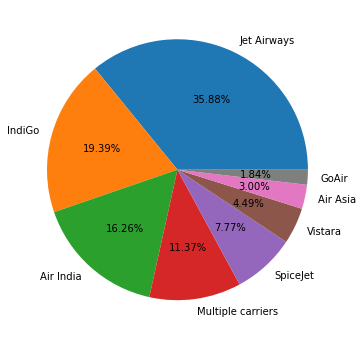

In [78]:
Pie('Airline',8)

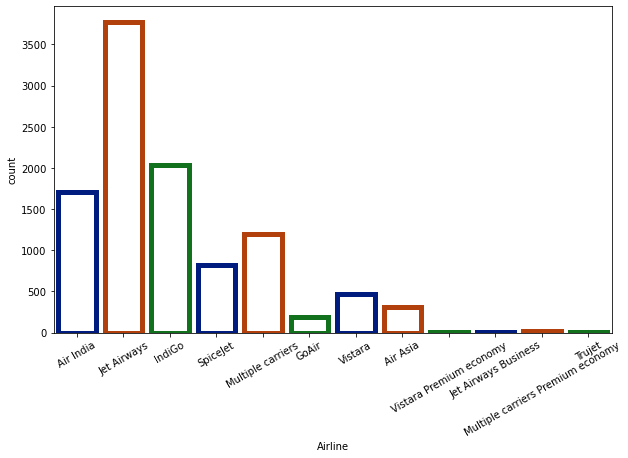

In [79]:
CPlot('Airline')

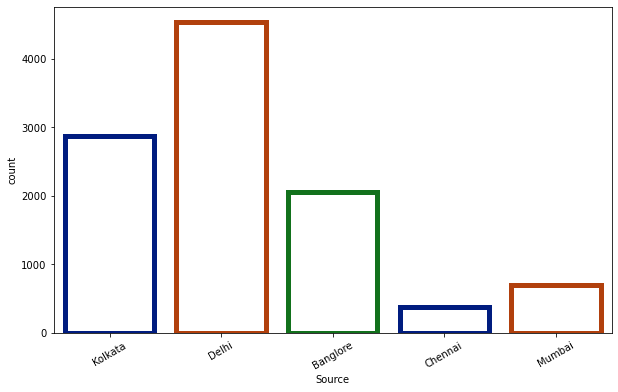

In [80]:
CPlot('Source')

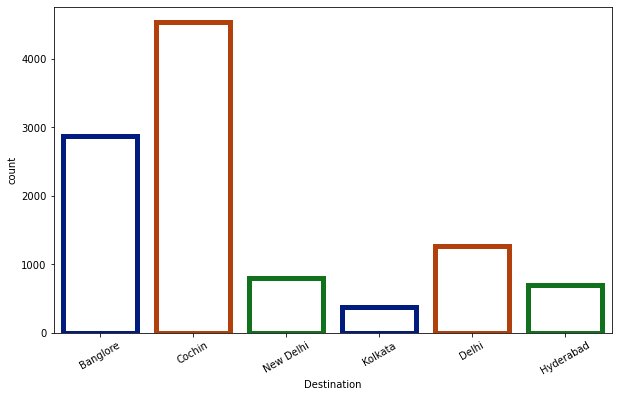

In [81]:
CPlot('Destination')

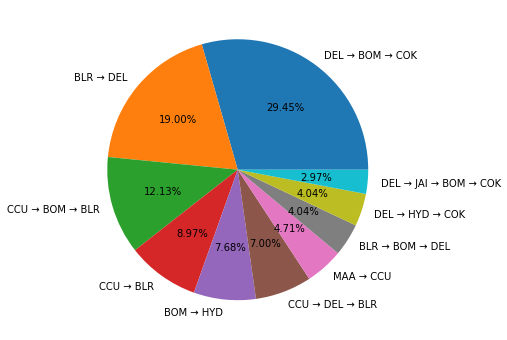

In [82]:
Pie('Route',10)

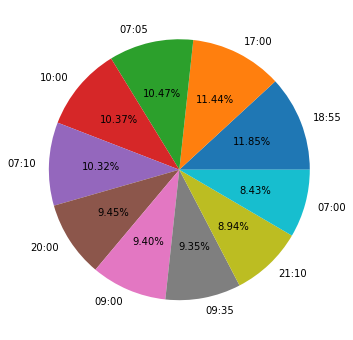

In [83]:
Pie('Dep_Time',10)

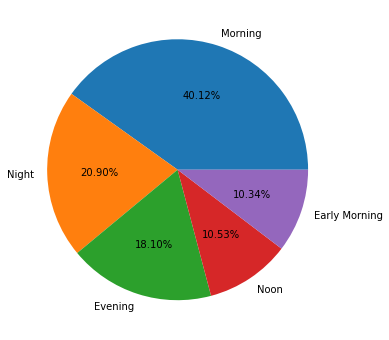

In [84]:
Pie('DepartureDayPart')

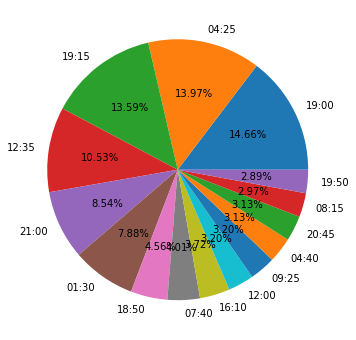

In [85]:
Pie('AccurateArrivalTime',15)

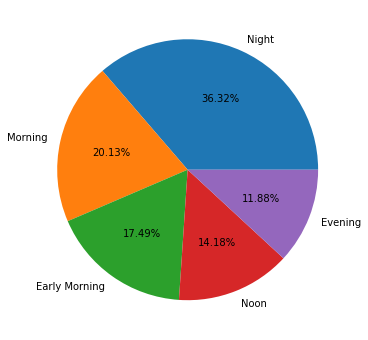

In [86]:
Pie('ArrivalDayPart')

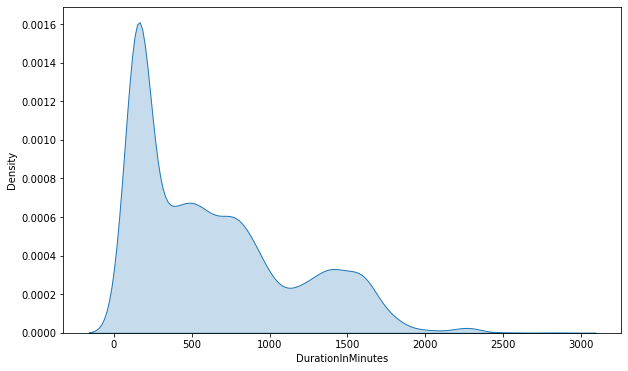

In [87]:
KPlot('DurationInMinutes')

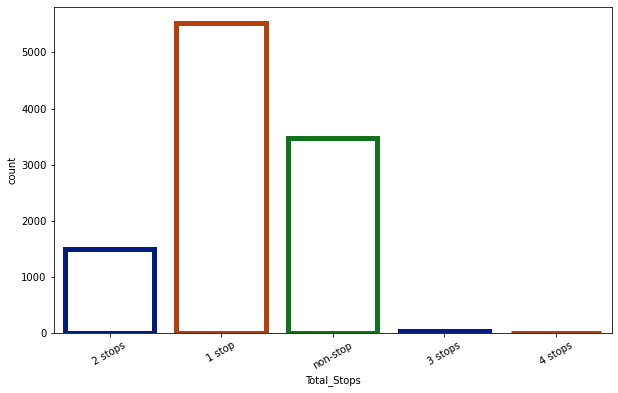

In [88]:
CPlot('Total_Stops')

In [89]:
Data = data[data['Additional_Info']!='No info']
Data.shape

(2283, 25)

In [90]:
pd.set_option('display.max_columns',None)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325,1,1,Evening,Night,Medium,Medium
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285,1,1,Evening,Night,Medium,Expensive
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145,0,1,Morning,Morning,Short,Cheap


In [91]:
data['DepartureHour'] = data['Dep_Time'].apply(lambda x : x.split(':')[0])
data['ArrivalHour'] = data['AccurateArrivalTime'].apply(lambda x : x.split(':')[0])

In [92]:
AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()

In [93]:
def ApplyEncoder(Encoder,OriginalColumn) : 
    global data
    Encoder.fit(data[OriginalColumn])
    return Encoder.transform(data[OriginalColumn])

In [94]:
data['AirLineEnc'] = ApplyEncoder(AirLineEnc,'Airline')
data['SourceEnc'] = ApplyEncoder(SourceEnc,'Source')
data['DestinationEnc'] = ApplyEncoder(DestinationEnc,'Destination')
data['AdditionalInfoEnc'] = ApplyEncoder(AdditionalInfoEnc,'Additional_Info')
data['MealIncludedEnc'] = ApplyEncoder(MealIncludedEnc,'MealIncluded')
data['DepDayEnc'] = ApplyEncoder(DepDayEnc,'DepartureDayPart')
data['ArrivDayEnc'] = ApplyEncoder(ArrivDayEnc,'ArrivalDayPart')
data['FlightLengthEnc'] = ApplyEncoder(FlightLengthEnc,'FlightLength')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange,DepartureHour,ArrivalHour,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium,05,13,1,3,0,7,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive,09,04,4,2,1,7,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325,1,1,Evening,Night,Medium,Medium,18,23,3,3,0,7,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285,1,1,Evening,Night,Medium,Expensive,16,21,3,0,5,7,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145,0,1,Morning,Morning,Short,Cheap,09,11,8,3,0,7,1,2,2,2


In [95]:
Columns_to_int = ['DayOfJourney','MonthOfJourney','DurationInMinutes','StopsCount','DepartureHour','ArrivalHour']

for col in Columns_to_int : 
    data[col] = data[col].astype(int)
data.head()  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,StopsCount,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange,DepartureHour,ArrivalHour,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,None,False,False,445,2,1,Early Morning,Noon,Medium,Medium,5,13,1,3,0,7,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,2,1,Morning,Early Morning,Long,Expensive,9,4,4,2,1,7,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,None,None,False,False,325,1,1,Evening,Night,Medium,Medium,18,23,3,3,0,7,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,None,None,False,False,285,1,1,Evening,Night,Medium,Expensive,16,21,3,0,5,7,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,11:25,None,None,False,False,145,0,1,Morning,Morning,Short,Cheap,9,11,8,3,0,7,1,2,2,2


In [96]:
X = data[['DayOfJourney', 'MonthOfJourney','DurationInMinutes', 'StopsCount',
        'DepartureHour', 'ArrivalHour', 'AirLineEnc', 'SourceEnc',
       'DestinationEnc', 'AdditionalInfoEnc', 'MealIncludedEnc', 'DepDayEnc',
       'ArrivDayEnc', 'FlightLengthEnc']]

y = data['Price']

In [97]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True , random_state = 44)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7905, 14), (2635, 14), (7905,), (2635,))

In [98]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33,normalize=False)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    


Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]


In [99]:
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')


for Model LinearRegression
Train Score is : 0.4775435721590314
Test Score is : 0.4910747444977117
MAE value is  : 2348.0094105104376
MSE value is  : 9482944.967448851
MdSE value is  : 1933.4450625718273
for Model SGDRegressor
Train Score is : -0.34121647825491275
Test Score is : -0.3704092607956637
MAE value is  : 3964.3075928041058
MSE value is  : 25535214.577200536
MdSE value is  : 2974.772098653234
for Model Lasso
Train Score is : 0.4775398346163826
Test Score is : 0.4911929599644921
MAE value is  : 2347.506528905212
MSE value is  : 9480742.225978155
MdSE value is  : 1933.1597395154167
for Model Ridge
Train Score is : 0.4775432967987898
Test Score is : 0.49110777230231617
MAE value is  : 2347.896100130014
MSE value is  : 9482329.551235816
MdSE value is  : 1935.0759379330302
for Model RandomForestRegressor


C:\Users\abdal\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\abdal\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed

Train Score is : 0.8854897897961012
Test Score is : 0.831247989774579
MAE value is  : 1114.5458613588278
MSE value is  : 3144402.854471501
MdSE value is  : 721.1112509484228
for Model GradientBoostingRegressor
Train Score is : 0.9957645205527272
Test Score is : 0.7184773159567559
MAE value is  : 1289.5096080523058
MSE value is  : 5245689.9927981105
MdSE value is  : 714.6003862122334
for Model SVR
Train Score is : 0.14774064858876534
Test Score is : 0.19402979197981418
MAE value is  : 2980.1397916178626
MSE value is  : 15017865.679539576
MdSE value is  : 2553.3068528618724
for Model DecisionTreeRegressor
Train Score is : 0.542581281950764
Test Score is : 0.5751718551306539
MAE value is  : 1887.0957185369543
MSE value is  : 7915940.258149131
MdSE value is  : 1282.6036484245433
for Model KNeighborsRegressor
Train Score is : 0.7047393829250137
Test Score is : 0.5713925437405293
MAE value is  : 1810.095787476281
MSE value is  : 7986361.211992409
MdSE value is  : 1183.8000000000002


In [100]:
from sklearn.model_selection import GridSearchCV

SelectedModel = RandomForestRegressor(random_state=33)
SelectedParameters = {'n_estimators':[100,200,500,1000],'max_depth':[2,4,8,10]}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
     mean_test_score  std_test_score                                   params  \
0          0.458371        0.022505    {'max_depth': 2, 'n_estimators': 100}   
1          0.457557        0.020504    {'max_depth': 2, 'n_estimators': 200}   
2          0.454872        0.017608    {'max_depth': 2, 'n_estimators': 500}   
3          0.455927        0.018540   {'max_depth': 2, 'n_estimators': 1000}   
4          0.626189        0.003478    {'max_depth': 4, 'n_estimators': 100}   
5          0.625980        0.004057    {'max_depth': 4, 'n_estimators': 200}   
6          0.626556        0.004646    {'max_depth': 4, 'n_estimators': 500}   
7          0.627794        0.003929   {'max_depth': 4, 'n_estimators': 1000}   
8          0.798254        0.003801    {'max_depth': 8, 'n_estimators': 100}   
9          0.799998        0.004054    {'max_depth': 8, 'n_estimators': 200}   
10         0.799500        0.004813    {'max_depth': 8, 'n_estimators': 500}   
11         0.799962  

In [101]:
GridSearchModel.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=33)

In [102]:
def DurationTime(n) : 
    if 'm' in n and 'h' in n : 
        H = n.split()[0]
        H = H.strip('h')
        
        M = n.split()[1]
        M = M.strip('m')
        return  int(M) + (60*int(H))
    elif 'm' in n and not 'h' in n : 
        M = n.strip('m')
        return  int(M) 
    else : 
        n = n.strip('h')
        return int(n)*60

    
test['DayOfJourney'] = test['Date_of_Journey'].apply(lambda x : x.split('/')[0])
test['MonthOfJourney'] = test['Date_of_Journey'].apply(lambda x : x.split('/')[1])
test['ArrivalTime'] = test['Arrival_Time'].apply(lambda x : x.split()[0])
test['DurationTime'] = test['Duration'].apply(lambda x  :DurationTime(x))
test['StopsCount'] = test['Route'].apply(lambda x : x.count('→')-1)
test['Meal Included'] = test['Additional_Info'].apply(lambda x : 1 if 
                                                      x !='In-flight meal not included' else 0 )
test['Additional_Info'].replace('No Info','No info',inplace=True)
test['DepartureDayPart'] =test['Dep_Time'].apply(lambda x : DayPart(x))
test['ArrivalDayPart'] = test['ArrivalTime'].apply(lambda x : DayPart(x))
test['FlightLength'] = test['DurationTime'].apply(lambda x : FlightLength(x))
test['DepartureHour'] = test['Dep_Time'].apply(lambda x : x.split(':')[0])
test['ArrivalHour'] = test['ArrivalTime'].apply(lambda x : x.split(':')[0])

test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,ArrivalTime,DurationTime,StopsCount,Meal Included,DepartureDayPart,ArrivalDayPart,FlightLength,DepartureHour,ArrivalHour
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,04:25,655,1,1,Evening,Early Morning,Long,17,04
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,10:20,240,1,1,Morning,Morning,Medium,06,10
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,19:00,1425,1,0,Night,Night,Long,19,19
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,21:00,780,1,1,Morning,Night,Long,08,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,02:45,170,0,1,Night,Early Morning,Short,23,02


In [103]:
def ApplyTestEncoder(Encoder,OriginalColumn) : 
    global test
    return Encoder.transform(test[OriginalColumn])


In [104]:
test['AirlineEnc'] = ApplyTestEncoder(AirLineEnc,'Airline')
test['SourceEnc'] = ApplyTestEncoder(SourceEnc,'Source')
test['DestinationEnc'] = ApplyTestEncoder(DestinationEnc,'Destination')
test['AdditionalInfoEnc'] = ApplyTestEncoder(AdditionalInfoEnc,'Additional_Info')
test['MealIncludedEnc'] = ApplyTestEncoder(MealIncludedEnc,'Meal Included')
test['DepartureDayPartEnc'] = ApplyTestEncoder(DepDayEnc,'DepartureDayPart')
test['ArrivalDayPartEnc'] = ApplyTestEncoder(ArrivDayEnc,'ArrivalDayPart')
test['FlightLengthEnc'] = ApplyTestEncoder(FlightLengthEnc,'FlightLength')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,ArrivalTime,DurationTime,StopsCount,Meal Included,DepartureDayPart,ArrivalDayPart,FlightLength,DepartureHour,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,04:25,655,1,1,Evening,Early Morning,Long,17,04,4,2,1,7,1,1,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,10:20,240,1,1,Morning,Morning,Medium,06,10,3,3,0,7,1,2,2,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,19:00,1425,1,0,Night,Night,Long,19,19,4,2,1,5,0,3,3,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,21:00,780,1,1,Morning,Night,Long,08,21,6,2,1,7,1,2,3,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,02:45,170,0,1,Night,Early Morning,Short,23,02,0,0,2,7,1,3,0,2


In [105]:
ColumnsToInt = ['DayOfJourney','MonthOfJourney','DurationTime','StopsCount',
                'Meal Included','DepartureHour','ArrivalHour'] 
for col in ColumnsToInt : 
    test[col]  =test[col].astype(int)
test.head()    


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,ArrivalTime,DurationTime,StopsCount,Meal Included,DepartureDayPart,ArrivalDayPart,FlightLength,DepartureHour,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,04:25,655,1,1,Evening,Early Morning,Long,17,4,4,2,1,7,1,1,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,10:20,240,1,1,Morning,Morning,Medium,6,10,3,3,0,7,1,2,2,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19:00,1425,1,0,Night,Night,Long,19,19,4,2,1,5,0,3,3,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21:00,780,1,1,Morning,Night,Long,8,21,6,2,1,7,1,2,3,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,02:45,170,0,1,Night,Early Morning,Short,23,2,0,0,2,7,1,3,0,2


In [106]:
X = test[['DayOfJourney','MonthOfJourney','DurationTime','StopsCount',
          'Meal Included','DepartureHour','ArrivalHour', 'AirlineEnc', 'SourceEnc','DestinationEnc', 
          'AdditionalInfoEnc', 'DepartureDayPartEnc', 'ArrivalDayPartEnc', 'FlightLengthEnc']]

In [107]:
Results = GridSearchModel.best_estimator_.predict(X)

C:\Users\abdal\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AirlineEnc
- ArrivalDayPartEnc
- DepartureDayPartEnc
- DurationTime
- Meal Included
Feature names seen at fit time, yet now missing:
- AirLineEnc
- ArrivDayEnc
- DepDayEnc
- DurationInMinutes
- MealIncludedEnc

  warnings.warn(message, FutureWarning)


In [108]:
Results = [np.round(i) for i in Results]
Results

[16463.0,
 28965.0,
 15621.0,
 16757.0,
 27144.0,
 15222.0,
 11331.0,
 32865.0,
 28022.0,
 22971.0,
 16540.0,
 16445.0,
 16499.0,
 8435.0,
 15532.0,
 13560.0,
 15997.0,
 17673.0,
 16897.0,
 11813.0,
 14196.0,
 16671.0,
 11222.0,
 21053.0,
 28163.0,
 15968.0,
 27800.0,
 15237.0,
 16933.0,
 19128.0,
 28491.0,
 10781.0,
 23967.0,
 29004.0,
 26095.0,
 26767.0,
 26048.0,
 12799.0,
 15970.0,
 16502.0,
 27549.0,
 9992.0,
 26405.0,
 17493.0,
 28316.0,
 28556.0,
 19214.0,
 26427.0,
 20527.0,
 16767.0,
 19757.0,
 37173.0,
 16879.0,
 10027.0,
 27160.0,
 28129.0,
 25402.0,
 11616.0,
 26981.0,
 16520.0,
 16753.0,
 20550.0,
 25419.0,
 21303.0,
 5410.0,
 27380.0,
 25814.0,
 16024.0,
 28432.0,
 22635.0,
 26279.0,
 15834.0,
 26596.0,
 16403.0,
 26426.0,
 28568.0,
 27385.0,
 42787.0,
 28614.0,
 16566.0,
 27610.0,
 15782.0,
 21782.0,
 27808.0,
 9836.0,
 10044.0,
 27012.0,
 16518.0,
 27828.0,
 15956.0,
 16447.0,
 16956.0,
 27107.0,
 15138.0,
 26668.0,
 26192.0,
 16659.0,
 19128.0,
 25965.0,
 20678.0,
 289